https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

In [60]:
import re
import os
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
dirs = ["biorxiv_medrxiv"]

In [30]:
docs = []
for d in dirs:
#     print(d)
    for file in tqdm(os.listdir(f"{d}/{d}")):
        
#         print(file)
        file_path = f"{d}/{d}/{file}"
        j = json.load(open(file_path, "rb"))
#         print(j)
        title = j['metadata']['title']
        
        try:
            abstract = j['abstract'][0]
        except:
            abstract = ""
#             print(j["abstract"])
        
        full_text = ""        
        for text in j['body_text']:
#             print(text["text"])
            full_text += text['text']+'\n\n'

#         print(abstract)
        
#         for key in j:
#             print(key)
        
#         print(j['metadata'])
#         for k in j['metadata']:
#             print(k)
        
#         print(full_text)

        docs.append([title, abstract, full_text])

100%|██████████| 885/885 [00:00<00:00, 1590.01it/s]


In [31]:
df = pd.DataFrame(docs, columns=['title', 'abstract', 'full_text'])

In [32]:
df.head()

,title,abstract,full_text
0,Multimerization of HIV-1 integrase hinges on c...,{'text': 'New anti-AIDS treatments must be con...,"In the absence of a curative treatment, the hi..."
1,Time-varying transmission dynamics of Novel Co...,{'text': 'Rationale: Several studies have esti...,"Eighteen years ago, severe acute respiratory s..."
2,p53 is not necessary for DUX4 pathology,{'text': 'Summary Statement: DUX4 is thought t...,Facioscapulohumeral muscular dystrophy (FSHD) ...
3,Virological assessment of hospitalized cases o...,"{'text': 'emerged in late 2019 1,2 . Initial o...",Pharyngeal virus shedding was very high during...
4,Potential impact of seasonal forcing on a SARS...,{'text': 'A novel coronavirus (SARS-CoV-2) fir...,(2.2 with 90% high density interval 1.4-3.8 (R...


In [33]:
incubation = df[df['full_text'].str.contains('incubation')]

In [34]:
incubation.head()

,title,abstract,full_text
1,Time-varying transmission dynamics of Novel Co...,{'text': 'Rationale: Several studies have esti...,"Eighteen years ago, severe acute respiratory s..."
4,Potential impact of seasonal forcing on a SARS...,{'text': 'A novel coronavirus (SARS-CoV-2) fir...,(2.2 with 90% high density interval 1.4-3.8 (R...
13,A Multiscale and Comparative Model for Recepto...,{'text': 'The respiratory syndrome caused by a...,The coronavirus disease 2019 has emerged at th...
20,Real-Time Estimation of the Risk of Death from...,{'text': 'The exported cases of 2019 novel cor...,"Since 8 December, 2019, clusters of pneumonia ..."
24,Title Analysis of the epidemic growth of the e...,"{'text': 'Background: On January 23, 2020, a q...","On December 31, 2019, the Health Commission in..."


In [36]:
texts = incubation['full_text'].values

In [41]:
print(len(texts))

237


In [53]:
incubation_times = []

for t in texts:
#     print(t)
    for sentence in t.split('. '):
        if "incubation" in sentence:
#             print(sentence)
            single_day = re.findall(r" \d{1,2} day", sentence)
#             single_day = re.findall(r" (\d{1,2}\.)?\d{1,2} day", sentence)
            
            if len(single_day) == 1:
                print(single_day[0])
                print(sentence)
                num = single_day[0].split(" ")
#                 print(num)
#                 break
                
                incubation_times.append(float(num[1]))
                print()
                print()

 5 day
Furthermore, we use R 0 = 2.3, a recovery rate of 0.2days −1 , and an incubation period of 5 days.

With these assumptions, we can solve the model and compare the resulting trajectories to the seasonal variation in prevalence of seasonal CoVs, see Fig


 5 day
Early estimates suggest an incubation time of about 5 days and an average serial interval of 7-8 days (Wu et al., 2020) 


 13 day
Since we collected this dataset 13 days after the outbound travel e ban, which is more than the estimated 95 th percentile of the incubation period (Li et al., 2020) , we assume that all 2019-nCoV cases traveled from Wuhan to the selected countries and regions have already been confirmed.

We expected that the international travel from Wuhan was relatively stable during this period


 2 day
According to the information that the general incubation period of the disease is 3-7 days and the diagnosis needs 2 days, the rapid increase of the suspected cases may be related to the banquet held by the 

In [54]:
print(incubation_times)
print(len(incubation_times))

[5.0, 5.0, 13.0, 2.0, 10.0, 7.0, 10.0, 7.0, 28.0, 14.0, 4.0, 14.0, 18.0, 6.0, 4.0, 14.0, 5.0, 14.0, 3.0, 42.0, 2.0, 3.0, 22.0, 22.0, 22.0, 6.0, 11.0, 7.0, 7.0, 14.0, 2.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 3.0, 5.0, 14.0, 14.0, 7.0, 4.0, 24.0, 14.0, 24.0, 21.0, 3.0, 3.0, 8.0, 8.0, 14.0, 10.0, 14.0, 14.0, 17.0, 24.0, 14.0, 5.0, 10.0, 18.0, 7.0, 5.0, 7.0, 5.0, 24.0, 6.0, 7.0, 14.0, 9.0, 7.0, 3.0, 3.0, 10.0, 1.0, 15.0, 5.0, 5.0, 3.0, 14.0, 11.0, 20.0, 20.0, 14.0]
84


The mean projected incubation time is 10.4285714


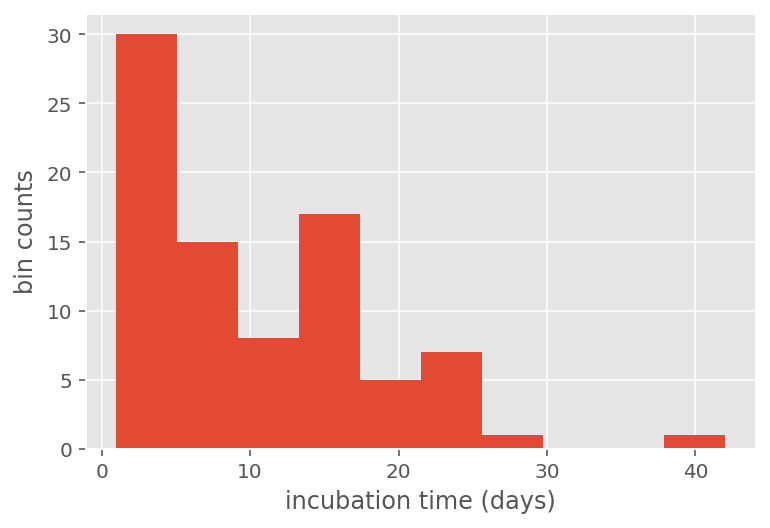

In [64]:
print(f"The mean projected incubation time is {round(np.mean(incubation_times),7)}")
plt.hist(incubation_times, bins=10)
plt.ylabel("bin counts")
plt.xlabel("incubation time (days)")
plt.show()

In [65]:
dirs = ["biorxiv_medrxiv", "comm_use_subset", "noncomm_use_subset", "custom_license"]

docs_2 = []
for d in dirs:
    for file in tqdm(os.listdir(f"{d}/{d}")):
        
        file_path = f"{d}/{d}/{file}"
        j = json.load(open(file_path, "rb"))
        title = j['metadata']['title']
        
        try:
            abstract = j['abstract'][0]
        except:
            abstract = ""
        
        full_text = ""        
        for text in j['body_text']:
            full_text += text['text']+'\n\n'

        docs_2.append([title, abstract, full_text])

100%|██████████| 16959/16959 [01:23<00:00, 202.63it/s]


In [66]:
df_2 = pd.DataFrame(docs_2, columns=['title', 'abstract', 'full_text'])
incubations = df_2[df_2['full_text'].str.contains('incubation')]
texts_2 = incubations['full_text'].values

In [67]:
incubations_times = []

for t in texts_2:
    for sentence in t.split('. '):
        if "incubation" in sentence:
            single_day = re.findall(r" \d{1,2} day", sentence)
            if len(single_day) == 1:
                num = single_day[0].split(" ")
                incubations_times.append(float(num[1]))

In [71]:
print(incubations_times)

[5.0, 5.0, 13.0, 2.0, 10.0, 7.0, 10.0, 7.0, 28.0, 14.0, 4.0, 14.0, 18.0, 6.0, 4.0, 14.0, 5.0, 14.0, 3.0, 42.0, 2.0, 3.0, 22.0, 22.0, 22.0, 6.0, 11.0, 7.0, 7.0, 14.0, 2.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 3.0, 5.0, 14.0, 14.0, 7.0, 4.0, 24.0, 14.0, 24.0, 21.0, 3.0, 3.0, 8.0, 8.0, 14.0, 10.0, 14.0, 14.0, 17.0, 24.0, 14.0, 5.0, 10.0, 18.0, 7.0, 5.0, 7.0, 5.0, 24.0, 6.0, 7.0, 14.0, 9.0, 7.0, 3.0, 3.0, 10.0, 1.0, 15.0, 5.0, 5.0, 3.0, 14.0, 11.0, 20.0, 20.0, 14.0, 3.0, 2.0, 4.0, 15.0, 5.0, 3.0, 3.0, 5.0, 21.0, 21.0, 14.0, 15.0, 13.0, 4.0, 3.0, 20.0, 21.0, 21.0, 5.0, 16.0, 21.0, 2.0, 15.0, 28.0, 5.0, 3.0, 30.0, 2.0, 4.0, 10.0, 9.0, 6.0, 14.0, 6.0, 2.0, 4.0, 14.0, 3.0, 5.0, 7.0, 56.0, 56.0, 5.0, 9.0, 16.0, 10.0, 5.0, 1.0, 3.0, 5.0, 8.0, 5.0, 3.0, 5.0, 12.0, 5.0, 7.0, 5.0, 15.0, 10.0, 5.0, 7.0, 6.0, 2.0, 42.0, 7.0, 4.0, 10.0, 3.0, 4.0, 4.0, 5.0, 2.0, 5.0, 5.0, 2.0, 42.0, 6.0, 16.0, 6.0, 7.0, 14.0, 6.0, 1.0, 3.0, 10.0, 2.0, 2.0, 4.0, 14.0, 4.0, 3.0, 3.0, 3.0, 3.0, 14.0, 21.0, 2.0, 14.0, 10.0, 6.0, 

The mean projected incubation time is 9.514988


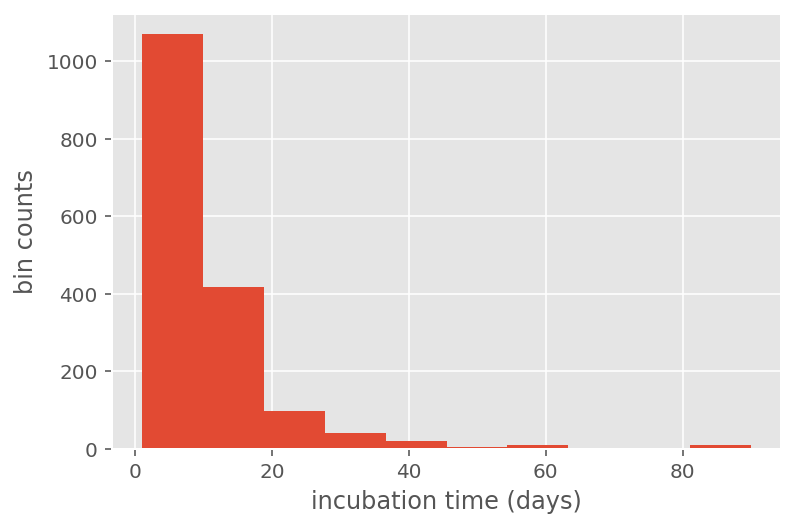

In [68]:
print(f"The mean projected incubation time is {round(np.mean(incubations_times), 7)}")
plt.hist(incubations_times, bins=10)
plt.ylabel("bin counts")
plt.xlabel("incubation time (days)")
plt.show()

The mean projected incubation time is 9.514988


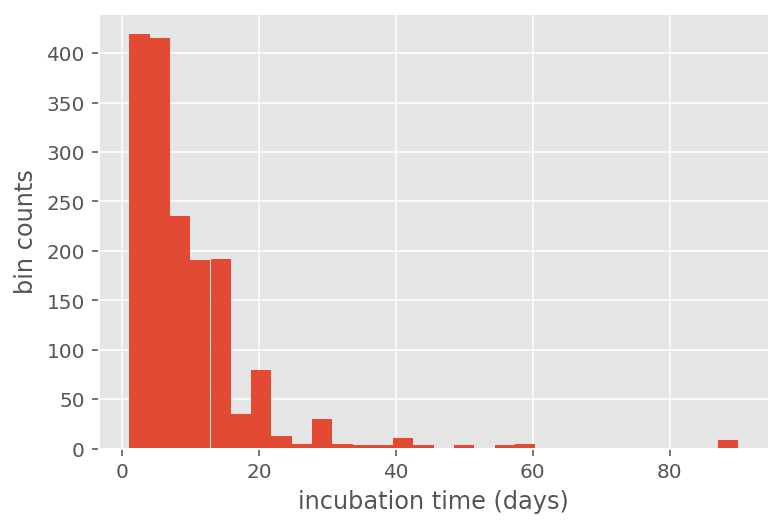

In [69]:
print(f"The mean projected incubation time is {round(np.mean(incubations_times), 7)}")
plt.hist(incubations_times, bins=30)
plt.ylabel("bin counts")
plt.xlabel("incubation time (days)")
plt.show()

In [ ]:
pass